In [2]:
import cv2

import matplotlib.pyplot as plt
import numpy as np

from LaneDetFollow import *


In [3]:
img = cv2.imread('/home/harsha/Pictures/track.png')

In [4]:
def pipeline(img, s_thresh=(100, 255), sx_thresh=(15, 255)):
    # img = undistort(img)
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS).astype(np.float)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    h_channel = hls[:,:,0]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 0, 2) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    color_binary = np.dstack((np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    return combined_binary

In [5]:
vid_pipeline(img)

TypeError: expected x and y to have same length

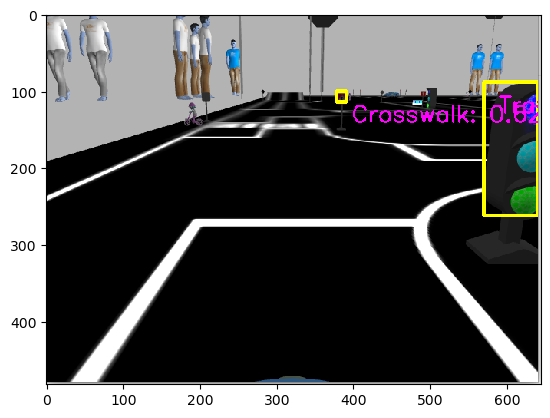

In [8]:
plt.imshow(img)

In [10]:
s_thresh=(100, 255)
sx_thresh=(15, 255)

In [21]:
img = np.copy(img)
# Convert to HLS color space and separate the V channel
hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS).astype(np.float)
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
h_channel = hls[:,:,0]
# Sobel x
sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 0, 2) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

# Threshold color channel
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1

color_binary = np.dstack((np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

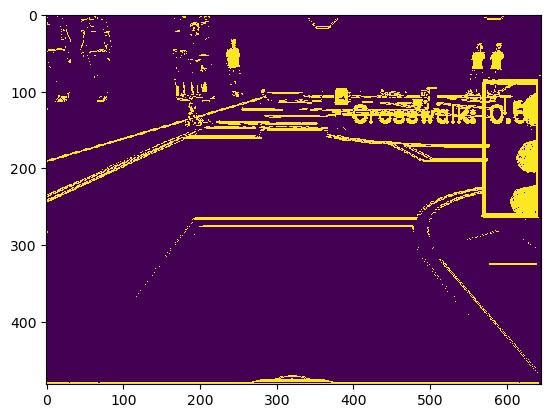

In [22]:
plt.imshow(combined_binary)